# Titanic Dataset

In [69]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import seaborn as sb
from sklearn.preprocessing import OneHotEncoder
import os

In [25]:
os.chdir('../data/')

df_gender_submission = analytics.read_csv('gender_submission.csv')
df_train = analytics.read_csv('train.csv')
df_test = analytics.read_csv('test.csv')

In [26]:
df_gender_submission_copy = df_gender_submission.copy()
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [27]:
os.chdir('../output/')

## Data Sets

In [28]:
df_gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Cleaning and Encoding

In [29]:
unessential_cols = ['Name','Ticket']
df_unessentials = df_train[['PassengerId'] + unessential_cols] 
df_train = df_train[df_train.columns.drop(unessential_cols)]
df_unessentials

,PassengerId,Name,Ticket
0,1,"Braund, Mr. Owen Harris",A/5 21171
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,5,"Allen, Mr. William Henry",373450
...,...,...,...
886,887,"Montvila, Rev. Juozas",211536
887,888,"Graham, Miss. Margaret Edith",112053
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607
889,890,"Behr, Mr. Karl Howell",111369


In [30]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [50]:
df_train = df_train.fillna(0)

In [34]:
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [35]:
df_train = df_train.replace({'male':0,'female':1})

In [51]:
df_train['Cabin'].value_counts()

Cabin
0              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [59]:
cabin_mappings = {}
[cabin_mappings.update({cabin:len(cabin_mappings)}) for cabin in (df_train['Cabin'].unique())]
cabin_mappings

{0: 0,
 'C85': 1,
 'C123': 2,
 'E46': 3,
 'G6': 4,
 'C103': 5,
 'D56': 6,
 'A6': 7,
 'C23 C25 C27': 8,
 'B78': 9,
 'D33': 10,
 'B30': 11,
 'C52': 12,
 'B28': 13,
 'C83': 14,
 'F33': 15,
 'F G73': 16,
 'E31': 17,
 'A5': 18,
 'D10 D12': 19,
 'D26': 20,
 'C110': 21,
 'B58 B60': 22,
 'E101': 23,
 'F E69': 24,
 'D47': 25,
 'B86': 26,
 'F2': 27,
 'C2': 28,
 'E33': 29,
 'B19': 30,
 'A7': 31,
 'C49': 32,
 'F4': 33,
 'A32': 34,
 'B4': 35,
 'B80': 36,
 'A31': 37,
 'D36': 38,
 'D15': 39,
 'C93': 40,
 'C78': 41,
 'D35': 42,
 'C87': 43,
 'B77': 44,
 'E67': 45,
 'B94': 46,
 'C125': 47,
 'C99': 48,
 'C118': 49,
 'D7': 50,
 'A19': 51,
 'B49': 52,
 'D': 53,
 'C22 C26': 54,
 'C106': 55,
 'C65': 56,
 'E36': 57,
 'C54': 58,
 'B57 B59 B63 B66': 59,
 'C7': 60,
 'E34': 61,
 'C32': 62,
 'B18': 63,
 'C124': 64,
 'C91': 65,
 'E40': 66,
 'T': 67,
 'C128': 68,
 'D37': 69,
 'B35': 70,
 'E50': 71,
 'C82': 72,
 'B96 B98': 73,
 'E10': 74,
 'E44': 75,
 'A34': 76,
 'C104': 77,
 'C111': 78,
 'C92': 79,
 'E38': 80,
 'D21

In [61]:
df_train['Cabin'] = df_train['Cabin'].replace(cabin_mappings)

In [64]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [65]:
embarked_mapping = {}
[embarked_mapping.update({embark:len(embarked_mapping)}) for embark in df_train['Embarked'].unique()]
embarked_mapping

{'S': 0, 'C': 1, 'Q': 2, 0: 3}

In [66]:
df_train['Embarked'] = df_train['Embarked'].replace(embarked_mapping) 

## Correlation

<Axes: >

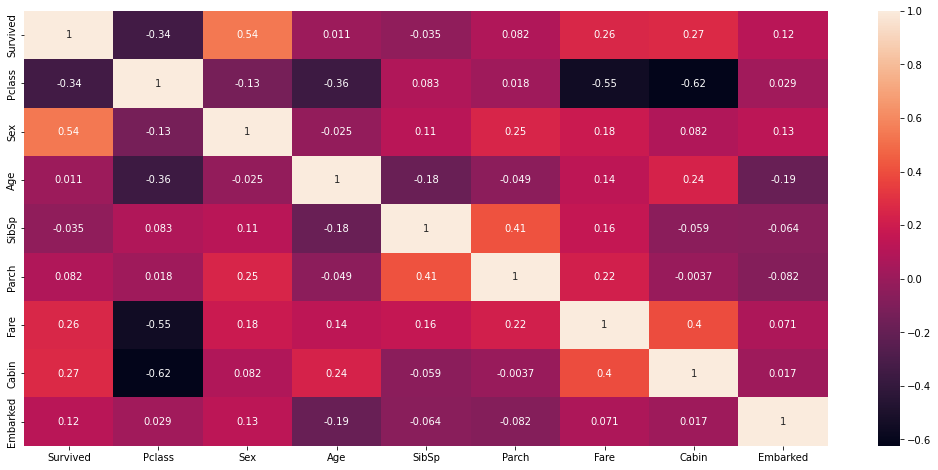

In [76]:
figure = graph.figure(figsize=(18,8))
sb.heatmap(df_train.iloc[:,1:].corr(),annot=True)

In [79]:
df_train['Survived'].unique()

array([0, 1])

In [82]:
df_train[df_train['Survived'] == 1]['Sex'].value_counts(normalize=True)*100

Sex
1    68.128655
0    31.871345
Name: proportion, dtype: float64

\begin{enumerate}
\item{Of the survived people most were males;}
\item{Survived and Fare has a good co-relation i.e. people who paid more, had a better chance to survive}
\item{Even the Pclass and survived has a bad correlation}
\item{Age and Survived have a good co-relation}
\item{Embarked also has a better correlation than Age}
\end{enumerate}